<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/ART_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#importing all libraries and data needed for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
df = pd.read_excel('Adolescent_Peads_DTG.xlsx')

In [85]:
df.shape

(6215, 19)

In [86]:
df


,LGA,Datim_Code,FacilityName,PepID,Sex,CurrentARTStatuse,ARTStartDate,RegimenAtARTStart,FirstTLD_Pickup,DateofFirstTLD_Pickup,CurAge_Months,CurAge_Years,VL_30Jun2019,VL_31Dec2019,VL_30Jun2020,VL_31Dec2020,VL_30Jun2021,VL_31Dec2021,VL_30Jun2022
0,ADO,RWy8gQx6BBr,Igumale General Hospital,GU-16-0074,M,Active,2016-04-13,TDF-3TC-EFV,TDF-3TC-DTG,2019-06-05,234.0,19,NaN,NaN,40.0,40.0,40.0,71.0,71.0
1,ADO,RWy8gQx6BBr,Igumale General Hospital,GUP-20-0013,M,Active,2020-10-07,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-12-01,41.0,3,NaN,NaN,NaN,NaN,NaN,390.0,399.0
2,APA,fhd28Wdp5gV,Ugbokpo General Hospital,OK-17-0031,F,Active,2013-05-23,AZT-3TC-NVP,TDF-3TC-DTG,2019-07-16,232.0,19,NaN,NaN,12782.0,20.0,20.0,0.0,0.0
3,APA,fhd28Wdp5gV,Ugbokpo General Hospital,OK-21-0026,M,Active,2021-03-08,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-09-15,87.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,APA,fhd28Wdp5gV,Ugbokpo General Hospital,OKP-16-0046,M,Active,2014-03-27,AZT-3TC-NVP,ABC-3TC-DTG,2020-07-14,104.0,9,NaN,NaN,5469.0,49934.0,25786.0,25786.0,1631.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6210,VANDEIKYA,fCwe9dV4kjP,Vandeikya General Hospital,VDP-21-0017,M,Active,2021-06-17,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-09-28,114.0,9,NaN,NaN,NaN,NaN,NaN,39.0,0.0
6211,VANDEIKYA,fCwe9dV4kjP,Vandeikya General Hospital,VDP-21-0018,M,Active,2021-07-13,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-10-06,54.0,4,NaN,NaN,NaN,NaN,NaN,NaN,644.0
6212,VANDEIKYA,fCwe9dV4kjP,Vandeikya General Hospital,VDP-21-0020,M,Active,2021-09-02,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-12-18,78.0,6,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6213,VANDEIKYA,fCwe9dV4kjP,Vandeikya General Hospital,VDP-21-0023,M,Active,2021-09-27,ABC-3TC-LPV/r,ABC-3TC-DTG,2022-02-03,114.0,9,NaN,NaN,NaN,NaN,NaN,NaN,20.0


In [87]:
# Delete multiple columns from the dataframe
df1 = df.drop(['LGA', 'Datim_Code', 'FacilityName', 'PepID', 'CurrentARTStatuse', 'CurAge_Months', 'RegimenAtARTStart',	'FirstTLD_Pickup'], axis=1)

In [88]:
df1.fillna(0)

,Sex,ARTStartDate,DateofFirstTLD_Pickup,CurAge_Years,VL_30Jun2019,VL_31Dec2019,VL_30Jun2020,VL_31Dec2020,VL_30Jun2021,VL_31Dec2021,VL_30Jun2022
0,M,2016-04-13,2019-06-05,19,0.0,0.0,40.0,40.0,40.0,71.0,71.0
1,M,2020-10-07,2021-12-01,3,0.0,0.0,0.0,0.0,0.0,390.0,399.0
2,F,2013-05-23,2019-07-16,19,0.0,0.0,12782.0,20.0,20.0,0.0,0.0
3,M,2021-03-08,2021-09-15,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,2014-03-27,2020-07-14,9,0.0,0.0,5469.0,49934.0,25786.0,25786.0,1631.0
...,...,...,...,...,...,...,...,...,...,...,...
6210,M,2021-06-17,2021-09-28,9,0.0,0.0,0.0,0.0,0.0,39.0,0.0
6211,M,2021-07-13,2021-10-06,4,0.0,0.0,0.0,0.0,0.0,0.0,644.0
6212,M,2021-09-02,2021-12-18,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6213,M,2021-09-27,2022-02-03,9,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [89]:
# Defining all the conditions the vl colums
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_31Dec2021'] = df1['VL_31Dec2021'].apply(condition)

In [90]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_30Jun2019'] = df1['VL_30Jun2019'].apply(condition)

In [91]:
			
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_31Dec2019'] = df1['VL_31Dec2019'].apply(condition)

In [92]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_30Jun2020'] = df1['VL_30Jun2020'].apply(condition)

In [93]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_31Dec2020'] = df1['VL_31Dec2020'].apply(condition)

In [94]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_30Jun2021'] = df1['VL_30Jun2021'].apply(condition)

In [95]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_30Jun2022'] = df1['VL_30Jun2022'].apply(condition)

In [96]:
def condition(x):
    if x > 18: #19 AND ABOVE
        return "YOUNG ADULT"
    elif x > 12: # 13 TO 18
        return "TEEN"
    elif x > 5: # 6 T0 12
        return 'SCHOOL AGE'
    elif x > 2: # 3 TO 5
        return "PRE SCHOOL"
    elif x > 1:
        return 'TODDLER'      
    else:
        return 'INFANT'
 
# Applying the conditions
df1['AgeGroup'] = df1['CurAge_Years'].apply(condition)

In [97]:
#extracting the quaters from TLD start date
df1['QTLD'] = df1['DateofFirstTLD_Pickup'].dt.to_period('Q')

In [98]:
df1.head()

,Sex,ARTStartDate,DateofFirstTLD_Pickup,CurAge_Years,VL_30Jun2019,VL_31Dec2019,VL_30Jun2020,VL_31Dec2020,VL_30Jun2021,VL_31Dec2021,VL_30Jun2022,AgeGroup,QTLD
0,M,2016-04-13,2019-06-05,19,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,LOW LLV,LOW LLV,YOUNG ADULT,2019Q2
1,M,2020-10-07,2021-12-01,3,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,HIGH LLV,HIGH LLV,PRE SCHOOL,2021Q4
2,F,2013-05-23,2019-07-16,19,SUPPRESSED,SUPPRESSED,UNSUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,YOUNG ADULT,2019Q3
3,M,2021-03-08,2021-09-15,7,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SCHOOL AGE,2021Q3
4,M,2014-03-27,2020-07-14,9,SUPPRESSED,SUPPRESSED,UNSUPPRESSED,UNSUPPRESSED,UNSUPPRESSED,UNSUPPRESSED,UNSUPPRESSED,SCHOOL AGE,2020Q3


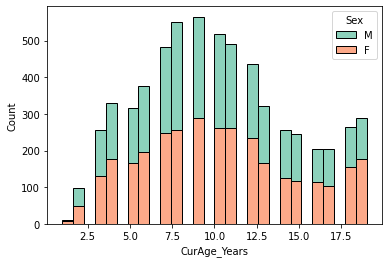

In [99]:
sns.histplot(data=df1, x="CurAge_Years", hue="Sex", multiple="stack", palette='Set2' )


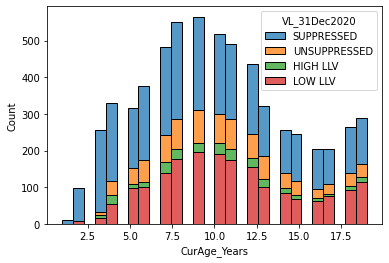

In [100]:
sns.histplot(data=df1, x="CurAge_Years", hue="VL_31Dec2020", multiple="stack")


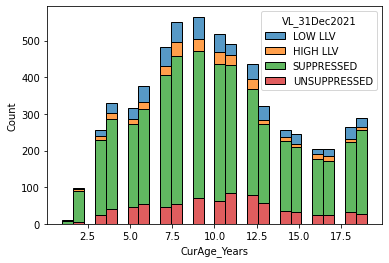

In [101]:
sns.histplot(data=df1, x="CurAge_Years", hue="VL_31Dec2021", multiple="stack")


Text(0.5, 1.0, 'SUPPRESSION BASED ON PCK-UP QUATER AFTER SECOND VL')

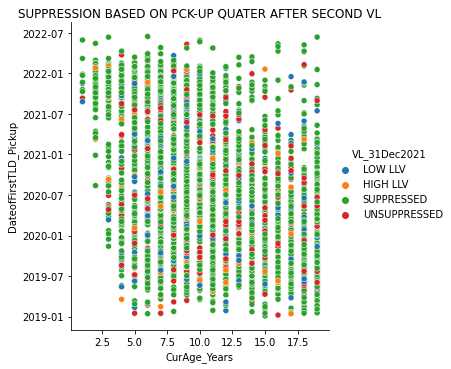

In [102]:
sns.relplot(y=df1.DateofFirstTLD_Pickup, x=df1.CurAge_Years, hue=df1.VL_31Dec2021)
plt.title("SUPPRESSION BASED ON PCK-UP QUATER AFTER SECOND VL")

In [ ]:
sns.lineplot(data=df1, y="CurAge_Years", x="ARTStartDate", hue = 'VL_31Dec2021', err_style="bars")

In [ ]:
sns.histplot(data=df1, x="CurAge_Years", y="ARTStartDate", hue='VL_30Jun2022')


In [ ]:
sns.scatterplot(data=df1, y="CurAge_Years", x="ARTStartDate", hue='VL_30Jun2022')
sns.rugplot(data=df1, y="CurAge_Years", x="ARTStartDate", hue='VL_31Dec2021')


In [ ]:
sns.catplot(data=df1, x="CurAge_Years", y='VL_30Jun2022', kind = 'boxen')

In [ ]:
df1.columns

In [ ]:
sns.lmplot(data = df, x='CurAge_Years', y='VL_31Dec2021', hue = 'Sex')

In [ ]:
df1.columns

In [ ]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Jun2022'] = df['VL_30Jun2022'].apply(condition)

In [ ]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Jun2021'] = df['VL_30Jun2021'].apply(condition)

In [ ]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Jun2020'] = df['VL_30Jun2020'].apply(condition)

In [ ]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Jun2019'] = df['VL_30Jun2019'].apply(condition)

In [ ]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Dec2021'] = df['VL_31Dec2021'].apply(condition)

In [ ]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Dec2020'] = df['VL_31Dec2020'].apply(condition)

In [ ]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Dec2019'] = df['VL_31Dec2019'].apply(condition)

In [ ]:
def condition(x):
    if x > 18: #19 AND ABOVE
        return 5
    elif x > 12: # 13 TO 18
        return 4
    elif x > 5: # 6 T0 12
        return 3
    elif x > 2: # 3 TO 5
        return 2
    elif x > 1:
        return 1      
    else:
        return 0
 
# Applying the conditions
df1['AgeGrade'] = df['CurAge_Years'].apply(condition)

In [ ]:
#Creating a dummy variable for sex status
df1['SEX_D'] = np.where(df['Sex'] == "M", 1, 0) 

In [ ]:
df2 = df1[['QTLD', 'VL_Jun2022', 'VL_Jun2021', 'VL_Jun2020', 'VL_Jun2019', 'VL_Dec2021', 'VL_Dec2020', 'SEX_D', 'CurAge_Years', 'AgeGrade']]

In [ ]:
df2.head()

In [ ]:
df2.describe()

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby('CurAge_Years').size().plot()
plt.title('SHOWING AGE DISTIBUTION', color='r', fontsize=18)

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['CurAge_Years']).size().plot(kind='bar')
plt.title('SHOWING AGE DISTIBUTION', color='r', fontsize=18)

In [ ]:
a = df.groupby(['CurAge_Years', 'Sex'])['Sex'].count().reset_index(name='Count')
a['Percent(%)'] = a.Count/len(df) * 100
print(a)

In [ ]:
plt.figure(figsize = (15,6))
df1.groupby(['CurAge_Years','Sex']).size().plot(kind = 'bar', color=["#5511aa", "#bed077"])
plt.title('SHOWING AGE DISTRIBUTION BASED ON SEX', color='r', fontsize=18)

In [ ]:
#number of each sex in eacg age groupp of the data set
a = df1.groupby(['AgeGroup', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
sns.countplot(data=df2, x='AgeGrade', hue='SEX_D', palette=["#111111", "#aaaaaa"])
plt.title('SEX VS AGE GROUP DISTRIBUTION', 
          color='r', fontsize='large')


In [ ]:
#dirst vl result based on at start of TLD based on quater

a = df1.groupby(['AgeGroup', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#percentage of first vl result at start of TLD by quater
a = df1.groupby(['VL_30Jun2019', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2020', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2021', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2022', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_31Dec2021', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_31Dec2020', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_31Dec2021', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_31Dec2020', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2019', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2020', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2021', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2022', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
sns.countplot(data=df1.loc[df1['VL_30Jun2022'] =='UNSUPPRESSED'], x='AgeGroup', hue='Sex')
plt.title('SEX & AGE GROUP DISTRIBUTION OF UNSUPPRESSED AT JUNE 2022', 
          color='r', fontsize='medium')


In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data=df1.loc[df1['VL_30Jun2022'] =='SUPPRESSED'], x='AgeGroup', hue='Sex')
plt.title('SEX & AGE GROUP DISTRIBUTION OF SUPPRESSED AT JUNE 2022', 
          color='r', fontsize='medium')

In [ ]:
sns.countplot(data=df1.loc[df1['VL_30Jun2021'] =='SUPPRESSED'], x='AgeGroup', hue='Sex')


In [ ]:
#showing outc

a = df1.groupby(['VL_30Jun2019', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
a = df1.groupby(['VL_30Jun2020', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
a = df1.groupby(['VL_30Jun2021', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
a = df1.groupby(['VL_31Dec2020', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
a = df1.groupby(['VL_30Jun2020', 'VL_30Jun2022', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:
a = df1.groupby(['VL_30Jun2022', 'AgeGroup'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

In [ ]:

plt.figure(figsize = (15,6))
df1.groupby('QTLD' ).size().plot (marker = '*', ms = 10, mec = 'r', mfc = 'g', ls = '--', c = 'hotpink', linewidth = '1.5')

df1.groupby('VL_30Jun2022').size().plot (marker = 'o', ms = 10, mec = 'g', mfc = 'r', ls = ':', c = 'y', linewidth = '2.5')

plt.title('TOTAL NUMBER CLIENTS ON EACH REGIMEN', color='b')

In [ ]:
plt.figure(figsize = (20,6))
sns.set_style('whitegrid')
sns.countplot(x='QTLD', hue='Sex',data=df1)
plt.title('BARCHART SHOWING THE TOTAL NUMBER OF CLIENTS PER SEX ON EACH REGIMEN ', color='r', fontsize=20)

In [ ]:
plt.figure(figsize = (5,6))
df1.groupby(df1['AgeGroup']).size().plot(kind = 'barh')
plt.title('AGE GROUP DISTRIBUTION', color='r', fontsize=20)

In [ ]:
plt.figure(figsize = (10,6))
df1.groupby(df1['Sex']).size().plot(kind = 'pie', autopct='%1.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING SEX DISTRIBUTION', color='r', fontsize=20)

In [ ]:
plt.figure(figsize = (15,6))
df1.groupby(['VL_30Jun2022','Sex'])['Sex'].count().plot(kind = 'pie', autopct='%1.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING STATUS BASED ON SEX AFTER 6 MONTHS', color='r', fontsize=20)

In [ ]:
plt.figure(figsize = (15,6))
df1.groupby(['VL_30Jun2021','Sex'])['Sex'].count().plot(kind = 'pie', autopct='%0.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING SUPPRESSION BASED ON SEX AFTER ONE YEAR', color='r', fontsize=20)

In [ ]:
plt.figure(figsize = (15,6))
df1.groupby(['VL_30Jun2022','AgeGroup'])['Sex'].count().plot(kind = 'bar')
plt.title('SHOWING SUPPRESSION BASED ON SEX AFTER SIX MONTHS AND REMAINED AFTER ONE YEAR', color='r', fontsize=20)

In [ ]:
plt.figure(figsize = (10,8)
sns.countplot(x = 'QTLD' ,  hue = 'VL_30Jun2022', data = df1, palette='Dark2_r')

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x = 'QStart' ,  hue = 'SECOND_STATUS', data = df2, palette='CMRmap')

In [ ]:
plt.figure(figsize = (30,10))
ap = sns.countplot(x = 'QTLD' ,  hue = 'FIRST_STATUS', data = df2, palette='bright')

In [ ]:
plt.figure(figsize = (20,10))
ab = sns.countplot(x = 'QTLD' ,  hue = 'SECOND_STATUS', data = df2, palette='winter')

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'RegimenAtARTStart' ,  hue = 'FIRST_STATUS', data = df2, palette=['#420371',"#FAAE5B"])
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER SIX MONTHS', color='r', font = 'bold', fontsize=20)

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'RegimenAtARTStart' ,  hue = 'SECOND_STATUS', data = df2, palette='Set1')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER ONE YEAR', color='r', font = 'bold', fontsize=20)

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='RegimenAtARTStart', data=df2,
            hue=df2[['FIRST_STATUS', 'Sex']].apply(tuple, axis=1))
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER ONE YEAR', color='r', font = 'bold', fontsize=20)

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='QTLD', data=df2,
            hue=df2[['FIRST_STATUS', 'Sex']].apply(tuple, axis=1))
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER 6 MONTHS ON TLD', color='r', font = 'bold', fontsize=20)

In [ ]:
plt.figure(figsize = (20, 8))
ab = sns.countplot(x ='QTLD', data=df2,
            hue=df2[['SECOND_STATUS', 'Sex']].apply(tuple, axis=1))
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER 6 MONTHS ON TLD', color='r', font = 'bold', fontsize=20)

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='RegimenAtARTStart', data=df2,
            hue=df2[['Sex', 'SECOND_STATUS']].apply(tuple, axis=1), palette='Dark2')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER ONE YEAR', color='r', font = 'bold', fontsize=20)

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
sns.countplot(x="RegimenAtARTStart", hue="Sex", data=df2)
plt.title('REGIMEN AT START BASED ON SEX', fontsize=20)

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='CurAge_Years', data=df2,
            hue=df2[['Sex', 'FIRST_STATUS']].apply(tuple, axis=1), palette='bright')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX & AGE AFTER ONE YEAR', color='r', fontsize=2)

In [ ]:
plt.figure(figsize = (20, 8))
af = sns.countplot(x ='CurAge_Years', data=df2,
            hue=df2[['Sex', 'SECOND_STATUS']].apply(tuple, axis=1), palette='tab10')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX & AGE AFTER ONE YEAR', color='r', font = 'bold', fontsize=2)

In [ ]:
df2.groupby(['Sex','SECOND_STATUS'])['RegimenAtARTStart'].count().plot(kind='bar')
plt.title('SHOWING SUPPRESSION BASED ON SEX AFTER SIX MONTHS AND REMAINED AFTER ONE YEAR', color='r', 
          font = 'bold', fontsize=20)

In [ ]:
# Using GroupBy multiple column
df2.groupby(['FirstTLD_Pickup','FIRST_STATUS', "Sex"])['SECOND_STATUS'].describe()

In [ ]:
# Using GroupBy multiple column
df2.groupby(['FirstTLD_Pickup','SECOND_STATUS', 'Sex'])['Sex'].count()

In [ ]:
# Using GroupBy multiple column
df2.groupby(['RegimenAtARTStart','Sex', 'SECOND_STATUS'])['Sex'].count()

In [ ]:
# Using GroupBy multiple column
df2.groupby(['RegimenAtARTStart','Sex','SECOND_STATUS'])['Sex'].describe()

In [ ]:
df2.groupby(['Sex', 'AgeGroup', 'FIRST_STATUS'])['FIRST_STATUS'].count()/len(df2)*100

In [ ]:
# Using GroupBy multiple column
df2.groupby(['RegimenAtARTStart','Sex', 'FIRST_STATUS'])['Sex'].describe()

In [ ]:
df2.groupby(['FIRST_STATUS', "Sex", ])["Sex"].describe()

In [ ]:
df2.groupby(['SECOND_STATUS', "Sex"])["Sex"].describe()

In [ ]:
df2.groupby('FIRST_STATUS')["Sex"].describe()

In [ ]:
df2.groupby(df2['DateDiff']/len(df2)*100)['Sex'].size()

In [ ]:

sns.lmplot(x="FSR", y="SSR", data=df2, fit_reg= True)
plt.title("")

In [ ]:
sns.lmplot(x="SSR", y="FSR", data=df2, fit_reg= True)
plt.title("Internet Use Rate and Breast Cancer Per 10")

In [ ]:
df2.groupby('FSR')["SSR"].var()

In [ ]:
df2.groupby(['RegimenAtARTStart','Sex','SECOND_STATUS'])['SSR'].describe()

In [ ]:
df2.groupby(['SEXR'])['SSR'].var()

In [ ]:
df2.groupby([ 'SSR'])['SEXR'].var()

In [ ]:
df2.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).describe()

In [ ]:
df2.columns

In [ ]:
df2.groupby(['FIRST_STATUS', 'SECOND_STATUS', 'AgeGroup', 'Sex']).corr()

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).max()

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).std()

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).mean()

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).min()

In [ ]:
df3.describe()

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).describe()

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).var()

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).cov()

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).corr()

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).std()

In [ ]:
df3.describe()

In [ ]:
df3.sem()

In [ ]:
df3.var()

In [ ]:
plt.figure(figsize = (15,6))
sns.set(style="darkgrid")
sns.regplot(x=df3.CurAge_Years, y=df3['FSR'], color='darkred')

In [ ]:
plt.figure(figsize = (15,6))
sns.set(style="darkgrid")
sns.regplot(y = df3.CurAge_Years, x = df3['SEXR'], color='darkred')

In [ ]:
sns.heatmap(df3.cov(),linewidths=1, annot=True)
plt.title('HEATMAP OF PERCENTAGE CHANGE OVER THE YEARS (%)', color='r')

In [ ]:
sns.heatmap(df3[['FSR', 'SSR', 'SEXR', 'AGR']].cov(),annot=True)

In [ ]:
sns.heatmap(df3[['FSR', 'SSR', 'SEXR', 'AGR']].corr(),annot=True)

In [ ]:
sns.regplot(data = df2, y = 'SSR', x = 'CurAge_Years')


In [ ]:
sns.regplot(data = df2, y = 'SEXR', x = 'CurAge_Years')

In [ ]:
sns.regplot(data = df2, y = 'FSR', x = 'VL_30Jun2022')

In [ ]:
sns.regplot(data = df2, y = 'SSR', x = 'VL_30Jun2022')

In [ ]:
sns.regplot(data = df2, y = 'AGR', x = 'VL_30Jun2021')

In [ ]:
df2

In [ ]:
sns.regplot(data = df2, y = 'FSR', x = 'VL_30Jun2021')

In [ ]:
sns.regplot(data = df2, y = 'FSR', x = 'VL_30Jun2022')

In [ ]:
sns.pairplot(df2, hue="FSR")

In [ ]:
sns.pairplot(df3, hue="SSR")

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'FIRST_STATUS')

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'SECOND_STATUS')

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'Sex')

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'AgeGroup')

In [ ]:
sns.pairplot(df2, vars=['FSR', 'SSR', 'CurAge_Years', 'SEXR'], hue = 'Sex', diag_kind='hist')

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'AgeGroup', diag_kind='hist')

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'FIRST_STATUS')

In [ ]:
df2.columns

In [ ]:
df2[df2.FIRST_STATUS=='SUPPRESSED'][['Sex','AgeGroup']].agg('count')/len(df2)*100

In [ ]:
sns.histplot(df2.DateofFirstTLD_Pickup,kde=True)

In [ ]:
sns.histplot(df2.ARTStartDate,kde=True)

In [ ]:
df3.corr()

In [ ]:
sns.relplot(
    data=df2,
    x="CurAge_Years", y='VL_30Jun2021',
    hue="SECOND_STATUS", style="SECOND_STATUS"
)

In [ ]:
sns.relplot(
    data=df2,
    x="CurAge_Years", y='VL_31Dec2021',
    hue="SECOND_STATUS", style="SECOND_STATUS"
)

In [ ]:
sns.relplot(
    data=df2,
    x="CurAge_Years", y='VL_30Jun2022',
    hue="SECOND_STATUS", style="SECOND_STATUS",kind="line",
    facet_kws=dict(sharex=False))

In [ ]:
sns.relplot(
    data=df2,
    x="CurAge_Years", y='VL_30Jun2022',
    hue="SECOND_STATUS", style="SECOND_STATUS",kind="line",
    facet_kws=dict(sharex=False))

In [ ]:
sns.displot(data=df2, kind="ecdf", x="VL_30Jun2022", col="AGR", hue="SECOND_STATUS")


In [ ]:
sns.displot(data=df2, kind="ecdf", x="VL_30Jun2022", col="SEXR", hue="FIRST_STATUS")


In [ ]:
sns.catplot(data=df2, kind="swarm", x="CurAge_Years", y="SECOND_STATUS", hue="Sex")



In [ ]:
sns.catplot(data=df2, kind="swarm", y="CurAge_Years", x="SECOND_STATUS", hue="Sex")



In [ ]:
sns.catplot(data=df2, kind="swarm", x="CurAge_Years", y="Sex", hue="FIRST_STATUS")



In [ ]:
sns.catplot(data=df2, kind="violin", y="CurAge_Years", x="Sex", hue="FIRST_STATUS", split=True)


In [ ]:
sns.catplot(data=df2, kind="swarm",y="CurAge_Years", x="Sex", hue="SECOND_STATUS", split=True)


In [ ]:
sns.catplot(data=df2, kind="violin", y="CurAge_Years", x="Sex", hue="FIRST_STATUS")


In [ ]:
sns.jointplot(data=df2, x="CurAge_Years", y="VL_30Jun2022", hue="FIRST_STATUS")


In [ ]:
sns.kdeplot(data=df2, x="CurAge_Years", hue="FIRST_STATUS", multiple="stack")


In [ ]:
sns.kdeplot(data=df2, x="CurAge_Years", hue="SECOND_STATUS", multiple="stack")


In [ ]:
sns.displot(data=df2, x="Sex", hue="FIRST_STATUS", col="SECOND_STATUS")


In [ ]:
sns.displot(data=df2, col="Sex", hue="FIRST_STATUS", x="SECOND_STATUS")


In [ ]:
sns.displot(data=df2, hue="Sex", col="FIRST_STATUS", x="SECOND_STATUS")

In [ ]:
df3

In [ ]:
import statsmodels.api as sm

#define response variable
y = df3['FSR']

#define predictor variables
x = df3[['AGR', 'SEXR', 'CurAge_Years' ]]

#add constant to predictor variables
x = sm.add_constant(x)

#fitting the regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

In [ ]:
#define response variable
y = df4['SSR']

#define predictor variables
x = df4[['AGR', 'SEXR', 'CurAge_Years' ]]

#add constant to predictor variables
x = sm.add_constant(x)

#fitting the regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

R-squared: 0.005. This is known as the coefficient of determination. It is the proportion of the variance in the response variable that can be explained by the predictor variables. In this example, 5% of the variation in the First viral load can be explained by the Age, Sex, and age group


F-statistic: 1.43. This is the overall F-statistic for the regression model.

Prob (F-statistic): 0.232. This is the p-value associated with the overall F-statistic.  It tells us whether or not the regression model as a whole is statistically significant. In other words, it tells us if the predictor variables combined have a statistically significant association with the response variable. In this case the p-value is greater than 0.05, which indicates that the predictor variables  'Age', 'Sex', and 'age group' combined does not have a statistically significant association with the first viral load.

coef: The coefficients for each predictor variable tell us the average expected change in the response variable, assuming the other predictor variable remains constant. For example, the younger the age group, the more it is to achieve viral suppression assuming all other factors remain constant, so also, suppression is more likely in female than in males..

P>|t|. The individual p-values tell us whether or not each predictor variable is statistically significant. We can see that all our variables are not statistically significant. Since they are not statistically significant.

In [ ]:
# from statsmodels.formula.api import ols

# #fit simple linear regression model
# model = ols('FSR ~ AGR', data=df2).fit()

# #view model summary
# print(model.summary())

In [ ]:
# xs = ('AGR', 'SEXR', 'CurAge_Years')
# for x in xs:
#     model = ols('SSR~ xs', data = df4).fit() #Oridnary least square method
#     result_anova = sm.stats.anova_lm(model) # ANOVA Test
#     print(result_anova)

    
#define response variable
y = df3['FSR']

#define predictor variables
x = df3[['AGR', 'SEXR', 'CurAge_Years' ]]

#add constant to predictor variables
x = sm.add_constant(x)

model = ols(x, y).fit()

result_anova = sm.stats.anova_lm(model) # ANOVA Test
print(result_anova)
   

In [ ]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'AGR', fig=fig)


In [ ]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'SEXR', fig=fig)


In [ ]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'CurAge_Years', fig=fig)


In [ ]:
x2 = df3.iloc[:, :-1].values  #extracts features from the dataset
y2 = df3.iloc[:, -1].values  #extracts the labels from the dataset


In [ ]:
from sklearn.linear_model import LinearRegression # import the Linear Regression model
lin_reg = LinearRegression() # creat model object
lin_reg.fit(x2, y2) # fits the model to the training data

In [ ]:
lin_reg.predict([[1,0,8]])

In [ ]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'CurAge_Years', fig=fig)



In [ ]:
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
poly_regr = PolynomialFeatures(degree = 4) # our polynomial model is of order
X_poly = poly_regr.fit_transform(x) # transforms the features to the polynomial form
lin_reg_2 = LinearRegression() # creates a linear regression object
lin_reg_2.fit(X_poly, y)

In [ ]:
lin_reg_2.predict(X_poly.fit_transform([[1,1,7]]))